In [47]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

In [48]:
from dotenv import load_dotenv
load_dotenv()

True

In [49]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [50]:
#2020
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["F","TSLA", "GM"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2020_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2020_ticker.head()

F                                 GM         \
                           open  high   low close    volume   open   high   
time                                                                        
2020-01-02 00:00:00-05:00  9.29  9.42  9.19  9.42  37027636  37.00  37.38   
2020-01-03 00:00:00-05:00  9.31  9.37  9.15  9.21  36733714  36.73  36.92   
2020-01-06 00:00:00-05:00  9.10  9.17  9.06  9.15  31435591  35.95  36.18   
2020-01-07 00:00:00-05:00  9.20  9.25  9.12  9.25  35164362  35.75  35.84   
2020-01-08 00:00:00-05:00  9.23  9.30  9.17  9.25  39750601  35.04  35.20   

                                                     TSLA                     \
                             low  close    volume    open      high      low   
time                                                                           
2020-01-02 00:00:00-05:00  36.55  37.38   5911901  424.95  430.6957  421.710   
2020-01-03 00:00:00-05:00  36.11  36.30   7193403  440.50  454.0000  436.920   
2020-01-06 00:00:00-05:00  35.80  35.84   6534769  440.47  451.5600  440.000   
2020-01-07 00:00:00-05:00  34.74  35.15  13207500  461.40  471.6300  453.355   
2020-01-08 00:00:00-05:00  34.41  34.66  10722570  473.70  498.4900  468.230   

                                               
                              close    volume  
time                                           
2020-01-02 00:00:00-05:00  430.2400   9113793  
2020-01-03 00:00:00-05:00  442.7500  16409329  
2020-01-06 00:00:00-05:00  451.4001   9807049  
2020-01-07 00:00:00-05:00  469.1700  16859537  
2020-01-08 00:00:00-05:00  492.0900  29804104

In [64]:
# Create and empty DataFrame for closing prices
df2020_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2020_closing_prices["F"] = df2020_ticker["F"]["close"]
df2020_closing_prices["TSLA"] = df2020_ticker["TSLA"]["close"]
df2020_closing_prices["GM"] = df2020_ticker["GM"]["close"]

# Drop the time component of the date
df2020_closing_prices.index = df2020_closing_prices.index.date

# Compute daily returns
df2020_daily_returns = df2020_closing_prices.pct_change().dropna()

# Display sample data
df2020_daily_returns.head()

,F,TSLA,GM
2020-01-03,-0.022293,0.029077,-0.028892
2020-01-06,-0.006515,0.019537,-0.012672
2020-01-07,0.010929,0.039366,-0.019252
2020-01-08,0.000000,0.048852,-0.013940
2020-01-09,0.002703,-0.021541,0.012118


In [52]:
df2020_daily_returns.describe()

,F,TSLA,GM
count,252.000000,252.000000,252.000000
mean,0.000339,0.006386,0.001152
std,0.035382,0.074440,0.038079
min,-0.111901,-0.774789,-0.156004
25%,-0.017175,-0.019565,-0.017856
50%,-0.002179,0.006540,0.000142
75%,0.018198,0.037762,0.018744
max,0.229927,0.199545,0.198751


<AxesSubplot:ylabel='Frequency'>

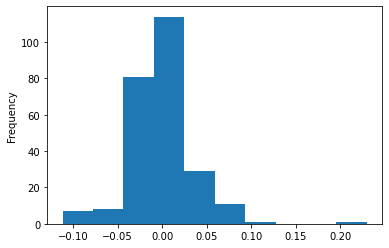

In [53]:
df2020_daily_returns["F"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

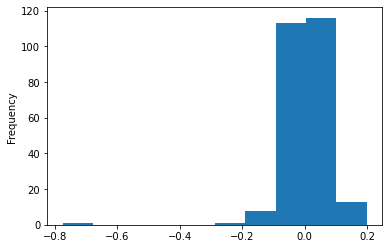

In [54]:
df2020_daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

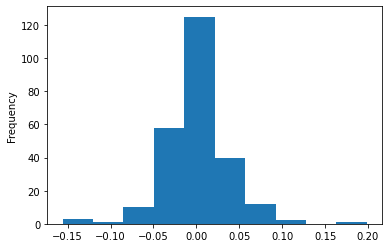

In [55]:
df2020_daily_returns["GM"].plot.hist()

In [56]:
df2020_daily_returns.head()

,F,TSLA,GM
2020-01-03,-0.022293,0.029077,-0.028892
2020-01-06,-0.006515,0.019537,-0.012672
2020-01-07,0.010929,0.039366,-0.019252
2020-01-08,0.000000,0.048852,-0.013940
2020-01-09,0.002703,-0.021541,0.012118


In [57]:
# Annual return
df2020_annual_returns = df2020_closing_prices.pct_change(252).dropna()
df2020_annual_returns.head()

,F,TSLA,GM
2020-12-31,-0.066879,0.639108,0.113697


In [58]:
# Incorporate revenue data from excel file
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted")
revenue_data = pd.read_excel("draft.xlsx")
#revenue_data.set_index("Date", inplace= True)
#revenue_data.index = pd.to_datetime(revenue_data.index)
revenue_data.head()
#revenue_data[‘revenue_data_pct_change’] = vix.sort_index(ascending=True).pct_change()
#total_returns = pd.merge(total_returns, vix.reset_index(), how=‘inner’, left_on= pd.to_datetime(total_returns[‘time’], utc=True).dt.date,right_on=pd.to_datetime(vix.reset_index()[‘Date’], utc=True).dt.date)
#total_returns.head()

,Ticker,Date,Revenue
0,TSLA,2018-01-01,21461268
1,TSLA,2019-01-01,24578000
2,TSLA,2020-01-01,31536000
3,F,2018-01-01,160338000
4,F,2019-01-01,155900000


In [59]:
df2020_annual_returns = pd.DataFrame(df2020_annual_returns.unstack())
df2020_annual_returns.reset_index(inplace = True)
df2020_annual_returns.head()

,level_0,level_1,0
0,F,2020-12-31,-0.066879
1,TSLA,2020-12-31,0.639108
2,GM,2020-12-31,0.113697


In [60]:
df2020_annual_returns["level_1"] = pd.to_datetime(df2020_annual_returns["level_1"]).dt.year
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"]).dt.year
revenue_data

,Ticker,Date,Revenue
0,TSLA,2018,21461268
1,TSLA,2019,24578000
2,TSLA,2020,31536000
3,F,2018,160338000
4,F,2019,155900000
5,F,2020,127144000
6,GM,2018,147049000
7,GM,2019,137237000
8,GM,2020,122485000


In [61]:
df2020_annual_returns

,level_0,level_1,0
0,F,2020,-0.066879
1,TSLA,2020,0.639108
2,GM,2020,0.113697


In [63]:
# Merge the two dataframes on the ticker and date
total_df = pd.merge(df2020_annual_returns, revenue_data, how="outer", left_on= ["level_0", "level_1"],right_on=["Ticker", "Date"]).dropna()
total_df.head()

,level_0,level_1,0,Ticker,Date,Revenue
0,F,2020.0,-0.066879,F,2020,127144000
1,TSLA,2020.0,0.639108,TSLA,2020,31536000
2,GM,2020.0,0.113697,GM,2020,122485000
